# EDA Steam Games 

Exploratory data analysis (EDA) is a fundamental phase in the process of understanding and preparing data. In this case, we have a dataset related to games from Steam, a digital distribution platform for video games. This EDA will focus on exploring the different characteristics of the games present in the dataset.


In this phase, we are going to use Python and some of its libraries, such as pandas, matplotlib and seaborn, to explore and visualize our dataset.

In [2]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy.orm import sessionmaker, aliased
from src.database.db_connection import get_engine
from src.models.SteamGames_models import Games


C:\Users\manue\AppData\Local\Temp\ipykernel_28748\1262648629.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Conected successfully to database PruebaCarga!


Load dataset

In [4]:
connection = get_engine()

Session = sessionmaker(bind=connection)
session = Session()

Conected successfully to database PruebaCarga!


In [5]:
table = aliased(Games)
query = session.query(table).statement
games = pd.read_sql(query, connection)


Concise summary of the dataframe, including the number of rows and columns, the column names, the data types in each column, and the number of non-null values present in each column.

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AppID                    85103 non-null  int64  
 1   Name                     85097 non-null  object 
 2   ReleaseDate              85103 non-null  object 
 3   EstimatedOwners          85103 non-null  object 
 4   PeakCCU                  85103 non-null  int64  
 5   RequiredAge              85103 non-null  int64  
 6   Price                    85103 non-null  float64
 7   DLCCount                 85103 non-null  int64  
 8   AboutTheGame             81536 non-null  object 
 9   SupportedLanguages       85103 non-null  object 
 10  FullAudioLanguages       85103 non-null  object 
 11  Reviews                  9743 non-null   object 
 12  HeaderImage              85103 non-null  object 
 13  Website                  39452 non-null  object 
 14  SupportUrl            

Detailed summary of the DataFrame games, including information about columns, data types, missing values, number of rows, and number of unique values.

In [7]:
games_summary = {
    'columns': games.columns,
    'types': games.dtypes,
    'missing': games.isna().sum(),
    'size': games.shape[0],

}

print(pd.DataFrame(games_summary))

                                         columns    types  missing   size
AppID                                      AppID    int64        0  85103
Name                                        Name   object        6  85103
ReleaseDate                          ReleaseDate   object        0  85103
EstimatedOwners                  EstimatedOwners   object        0  85103
PeakCCU                                  PeakCCU    int64        0  85103
RequiredAge                          RequiredAge    int64        0  85103
Price                                      Price  float64        0  85103
DLCCount                                DLCCount    int64        0  85103
AboutTheGame                        AboutTheGame   object     3567  85103
SupportedLanguages            SupportedLanguages   object        0  85103
FullAudioLanguages            FullAudioLanguages   object        0  85103
Reviews                                  Reviews   object    75360  85103
HeaderImage                          H

We made a bar chart showing the number of columns of each type of data in the DataFrame games.

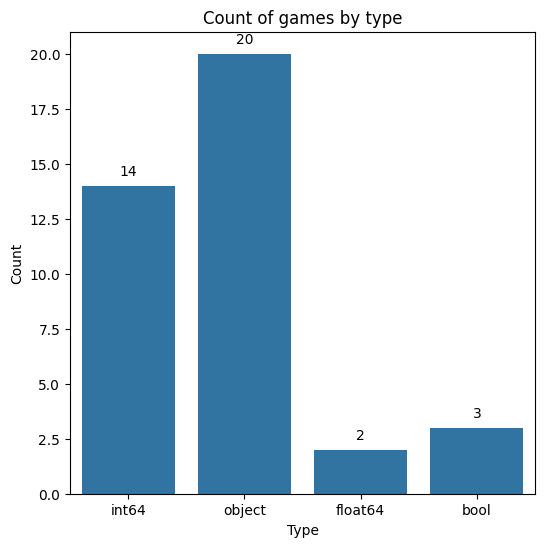

In [10]:
# Crear la gráfica de barras
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='types', data=games_summary)

# Agregar los valores encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

# Mostrar la gráfica
plt.show()

Delete columns

In [8]:
drop_columns = ['ScoreRank', 'Reviews', 'HeaderImage', 'Website', 'SupportUrl', 'SupportEmail', 'MetacriticUrl', 'Screenshots', 'Movies', 'AboutTheGame', 'Notes']
games = games.drop(drop_columns, axis=1)

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AppID                    85103 non-null  int64  
 1   Name                     85097 non-null  object 
 2   ReleaseDate              85103 non-null  object 
 3   EstimatedOwners          85103 non-null  object 
 4   PeakCCU                  85103 non-null  int64  
 5   RequiredAge              85103 non-null  int64  
 6   Price                    85103 non-null  float64
 7   DLCCount                 85103 non-null  int64  
 8   SupportedLanguages       85103 non-null  object 
 9   FullAudioLanguages       85103 non-null  object 
 10  Windows                  85103 non-null  bool   
 11  Mac                      85103 non-null  bool   
 12  Linux                    85103 non-null  bool   
 13  MetacriticScore          85103 non-null  int64  
 14  UserScore             

Release Date 

In [18]:
games['ReleaseDate'] = pd.to_datetime(games['ReleaseDate'], format='mixed')
games.head(2)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,SupportedLanguages,FullAudioLanguages,...,Recommendations,AveragePlaytimeForever,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,"[[, ', E, n, g, l, i, s, h, ', ]]","[[, ]]",...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"[[, ', E, n, g, l, i, s, h, ', ,, , ', F, r, ...","[[, ]]",...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."


Name nullos 

In [10]:
games.loc[games['Name'].isna()].index

Index([25274, 72113, 77259, 77540, 77612, 77666], dtype='int64')

Delete Nulls

In [11]:
#Delete null names 
games = games.drop(games.loc[games['Name'].isna()].index)
games.isna().sum()

AppID                          0
Name                           0
ReleaseDate                    0
EstimatedOwners                0
PeakCCU                        0
RequiredAge                    0
Price                          0
DLCCount                       0
SupportedLanguages             0
FullAudioLanguages             0
Windows                        0
Mac                            0
Linux                          0
MetacriticScore                0
UserScore                      0
Positive                       0
Negative                       0
Achievements                   0
Recommendations                0
AveragePlaytimeForever         0
AveragePlaytimeTwoWeeks        0
MedianPlaytimeForever          0
MedianPlaytimeTwoWeeks         0
Developers                  3581
Publishers                  3861
Categories                  4595
Genres                      3553
Tags                       21094
dtype: int64

SupportedLanguages

In [ ]:
games['SupportedLanguages']

In [ ]:
arry_column = games['SupportedLanguages'].apply(list)

print(games['SupportedLanguages'].head(5))

In [ ]:
# Split de la columna SupportedLanguages
games_languages = games['SupportedLanguages'].str.strip("[]").str.split(', ', expand=True)

# Melt para llevar las columnas a filas
games_melted = pd.melt(games_languages, value_name='Language').dropna()['Language'].str.strip("'")

# Contar la frecuencia de cada lenguaje
language_counts = games_melted.value_counts().reset_index()

# Renombrar las columnas
language_counts.columns = ['Language', 'Frequency']

# Mostrar el resultado
#print(language_counts)


In [ ]:
language_counts['Language'].unique()

In [ ]:
unique_values = games['NumSupportedLanguages'].unique()
print(unique_values)


In [ ]:
idiomas_frecuencia = games['SupportedLanguages'].apply(pd.Series).stack().value_counts()
print(idiomas_frecuencia)

Developers	

In [ ]:
unique_values = games['Developers'].unique()
print(unique_values)

In [ ]:
games.loc[games['Developers'].isna(),"Name"].unique()

Categories 

In [ ]:
games['Categories'].fillna('Unknown', inplace=True)


In [ ]:
games.isna().sum()

Genres

Tags 

In [ ]:
print(games['Tags'])

In [ ]:
from collections import Counter

# Supongamos que tienes un DataFrame llamado games y la columna es 'tags'
# games = ...

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un nuevo DataFrame para mostrar los resultados
tags_games = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_games = tags_games.sort_values(by='Count', ascending=False)

# Mostrar los 10 tags más comunes (puedes ajustar esto según tus necesidades)
print(tags_games)
print(tags_games['Tag'].unique()) 


In [ ]:

# Separar los tags y contar su frecuencia
tags_series = games['Tags'].str.split(',').dropna()
flattened_tags = [tag for sublist in tags_series for tag in sublist]
tag_counts = Counter(flattened_tags)

# Crear un DataFrame para mostrar los resultados
tags_games = pd.DataFrame(list(tag_counts.items()), columns=['Tags', 'Count'])

# Ordenar el DataFrame por la columna 'Count' de mayor a menor
tags_games = tags_games.sort_values(by='Count', ascending=False)

# Relacionar los tags con la columna 'EstimatedOwners'
tags_and_owners = pd.merge(games[['Tags', 'EstimatedOwners']], tags_games, left_on='Tags', right_on='Tags', how='left')

# Mostrar los primeros 10 registros del DataFrame resultante
print(tags_and_owners)


Estimated Owners

In [11]:
games['EstimatedOwners'].value_counts()

EstimatedOwners
0 - 20000                55284
0 - 0                    11499
20000 - 50000             7808
50000 - 100000            3886
100000 - 200000           2566
200000 - 500000           2142
500000 - 1000000           906
1000000 - 2000000          521
2000000 - 5000000          329
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

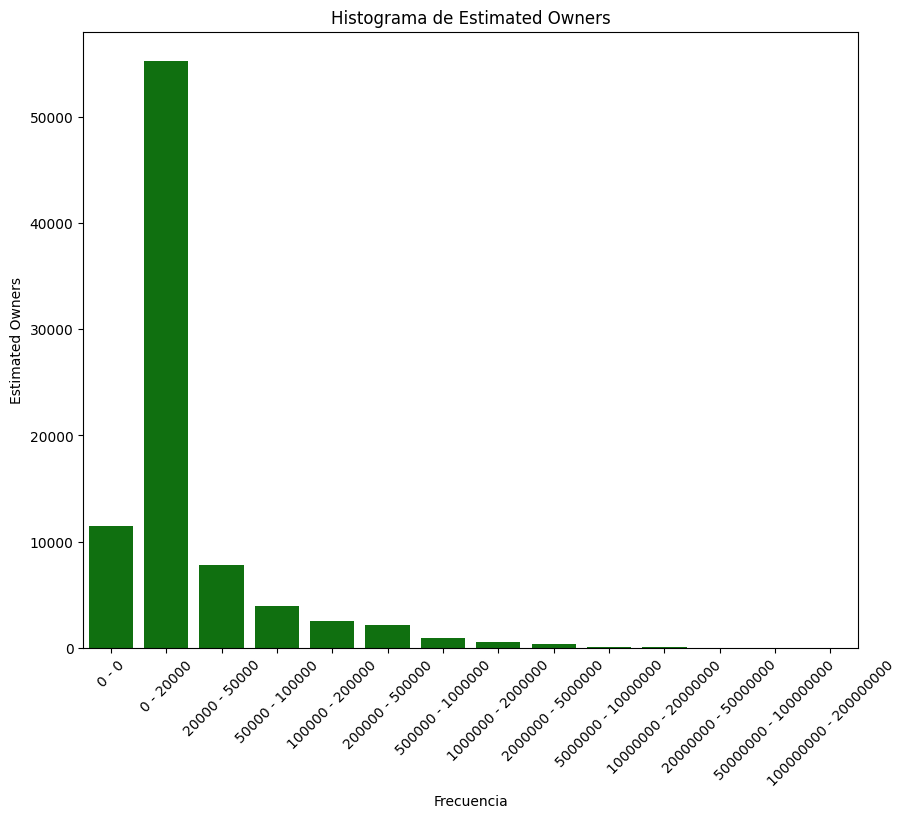

In [12]:
# Definir el orden correcto de las categorías
order = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000',
         '100000 - 200000', '200000 - 500000', '500000 - 1000000',
         '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000',
         '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000']

# Convertir la columna 'EstimatedOwners' a una categoría ordenada
games['EstimatedOwners'] = pd.Categorical(games['EstimatedOwners'], categories=order, ordered=True)

# Ordenar el DataFrame por la nueva columna 'EstimatedOwners'
games_sorted = games.sort_values(by='EstimatedOwners')

# Crear el gráfico de barras con Seaborn y ajustar el tamaño
plt.figure(figsize=(10, 8))
sns.countplot(x='EstimatedOwners', data=games_sorted, color='green')

plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Estimated Owners')
plt.title('Histograma de Estimated Owners')

# Mostrar el gráfico de barras
plt.show()


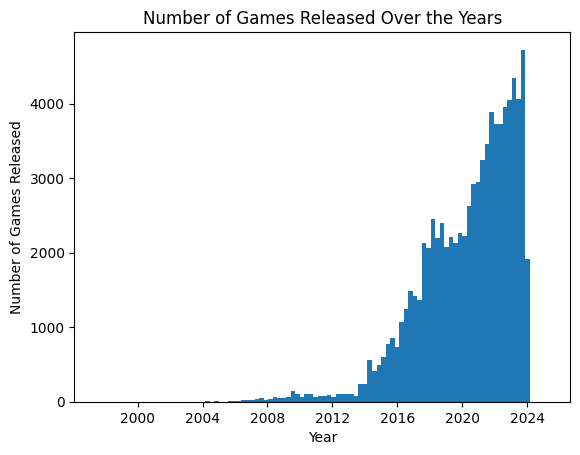

In [29]:
plt.hist(games['ReleaseDate'], bins=100)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Over the Years')
plt.show()

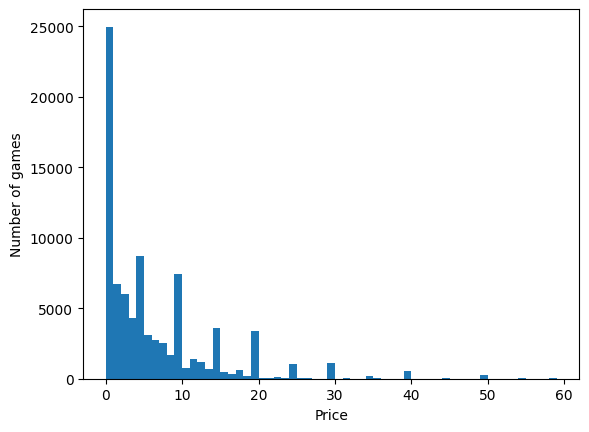

In [30]:
plt.hist(games['Price'], bins=list(range(0, 60)))
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [31]:
print(games['Price'].value_counts())

Price
0.00     16456
4.99      7752
9.99      7199
0.99      6497
1.99      5192
         ...  
4.40         1
7.94         1
39.39        1
13.91        1
9.12         1
Name: count, Length: 584, dtype: int64


Columns Mac, Linux and Windows

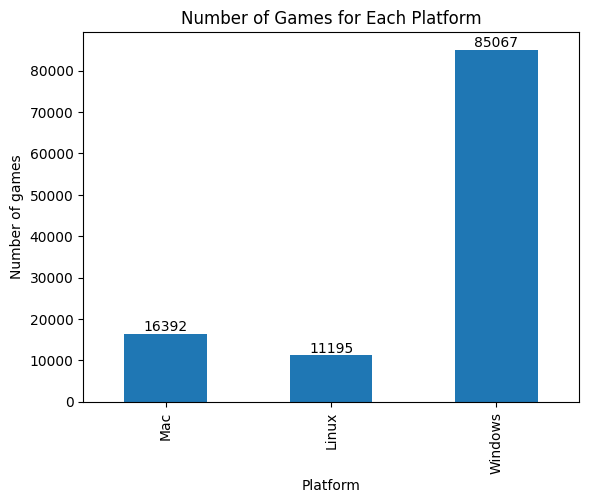

In [13]:
platform_counts = games[['Mac', 'Linux', 'Windows']].sum()

ax = platform_counts.plot(kind='bar')
for i, v in enumerate(platform_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Platform')
plt.ylabel('Number of games')
plt.title('Number of Games for Each Platform')
plt.show()

New column called 'OS'

In [12]:
# Función para determinar el sistema operativo
def determine_os(row):
    os_list = []
    if row['Windows']:
        os_list.append('Windows')
    if row['Mac']:
        os_list.append('Mac')
    if row['Linux']:
        os_list.append('Linux')
    return ', '.join(os_list)

# Crear la columna OS utilizando la función determine_os
games['OS'] = games.apply(determine_os, axis=1)

# Mostrar el DataFrame resultante
games.head(5)

,AppID,Name,ReleaseDate,EstimatedOwners,PeakCCU,RequiredAge,Price,DLCCount,SupportedLanguages,FullAudioLanguages,...,AveragePlaytimeForever,AveragePlaytimeTwoWeeks,MedianPlaytimeForever,MedianPlaytimeTwoWeeks,Developers,Publishers,Categories,Genres,Tags,OS
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,"[[, ', E, n, g, l, i, s, h, ', ]]","[[, ]]",...,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",Windows
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"[[, ', E, n, g, l, i, s, h, ', ,, , ', F, r, ...","[[, ]]",...,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...","Windows, Mac"
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"[[, ', E, n, g, l, i, s, h, ', ,, , ', P, o, ...","[[, ]]",...,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,Windows
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,"[[, ', E, n, g, l, i, s, h, ', ,, , ', F, r, ...","[[, ]]",...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...","Windows, Mac, Linux"
4,1153730,SteamCity Chronicles - Rise Of The Rose,"Jun 16, 2020",0 - 20000,0,0,12.99,0,"[[, ', E, n, g, l, i, s, h, ', ,, , ', S, p, ...","[[, ', E, n, g, l, i, s, h, ', ,, , ', J, a, ...",...,26,0,26,0,FeelThere,FeelThere,Single-player,"Action,Casual,Indie,Strategy","Strategy,Indie,Action,Steampunk,Turn-Based,Tur...",Windows


Clean Estimated Owners

In [13]:
games["EstimatedOwners"]

0        0 - 20000
1        0 - 20000
2        0 - 20000
3        0 - 20000
4        0 - 20000
           ...    
85098        0 - 0
85099        0 - 0
85100        0 - 0
85101        0 - 0
85102        0 - 0
Name: EstimatedOwners, Length: 85097, dtype: object

In [24]:
# Suponiendo que games es tu DataFrame
columns_to_drop = ['OwnersClean']

# Verifica si las columnas existen antes de intentar eliminarlas
games.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [26]:
# Extracting the "Estimated owners" column
estimated_owners_column = games["EstimatedOwners"]

# Function to clean ownership ranges and calculate median
def clean_ownership_range(x):
    x = x.strip()
    lower, upper = map(int, x.split("-"))
    median = (upper - lower) / 2
    return median

# Example usage of the clean_ownership_range function
example_cleaned_ownership = clean_ownership_range("0 - 20000")

# Applying the clean_ownership_range function to each row and creating a new column
games['OwnersClean'] = games['EstimatedOwners'].apply(clean_ownership_range)

# Extracting the 'owners_clean' column
cleaned_owners_column = games['OwnersClean']

In [31]:
# Grouping by game name, aggregating the cleaned ownership values, sorting, and selecting top 10
most_downloaded_games = (
    games.groupby("Name")
    .agg({"OwnersClean": "sum"})
    .reset_index()
    .sort_values("OwnersClean", ascending=False)
    .head(10)
)

In [29]:
games["OwnersClean"]

0        10000.0
1        10000.0
2        10000.0
3        10000.0
4        10000.0
          ...   
85098        0.0
85099        0.0
85100        0.0
85101        0.0
85102        0.0
Name: OwnersClean, Length: 85097, dtype: float64

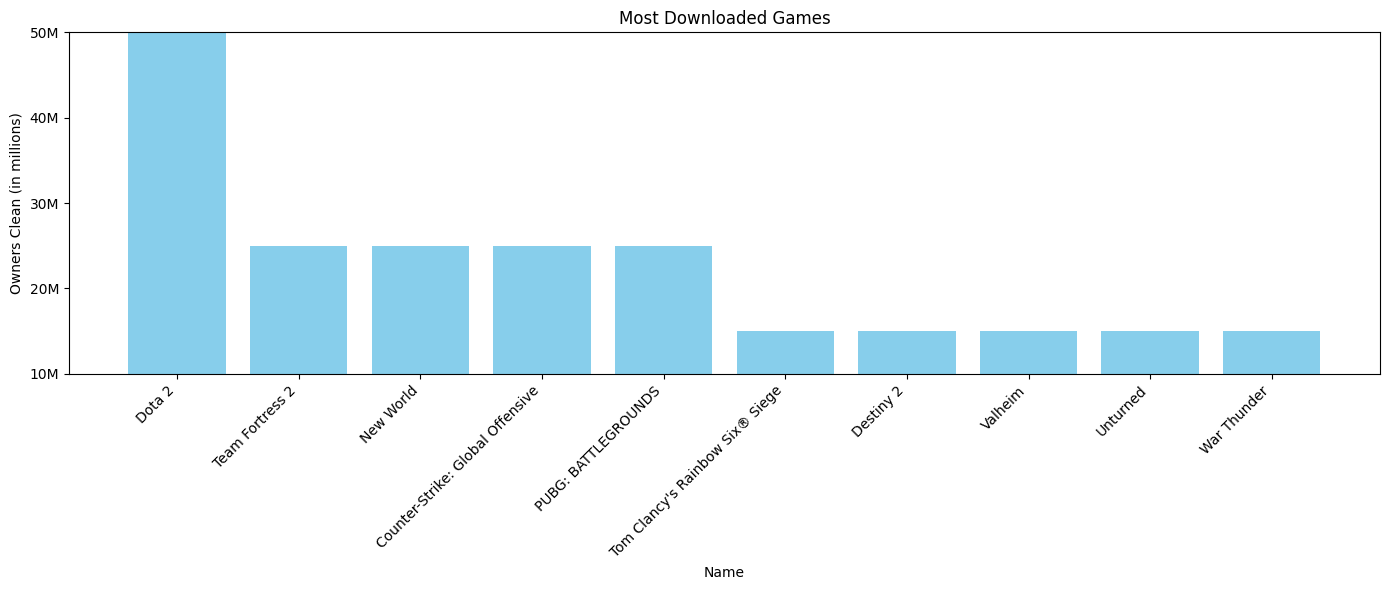

In [53]:
# Llenar los valores nulos en la columna 'Name' sin usar inplace=True
most_downloaded_games['Name'] = most_downloaded_games['Name'].fillna('')

# Ordenar el DataFrame por la columna 'owners clean' para obtener una mejor visualización
games_sorted = most_downloaded_games.sort_values(by='OwnersClean', ascending=False)

# Filtrar los juegos con Owners Clean entre 10M y 50M
filtered_games = games_sorted[(games_sorted['OwnersClean'] >= 10_000_000) & (games_sorted['OwnersClean'] <= 50_000_000)]

# Crear un gráfico de barras
plt.figure(figsize=(14, 6))
bars = plt.bar(filtered_games['Name'], filtered_games['OwnersClean'], color='skyblue')
plt.title('Most Downloaded Games')
plt.xlabel('Name')
plt.ylabel('Owners Clean (in millions)')

# Ajustar la escala del eje y y agregar la letra 'M' a las etiquetas
plt.ylim(10_000_000, 50_000_000)  # Establecer límites del eje y
plt.yticks([10_000_000, 20_000_000, 30_000_000, 40_000_000, 50_000_000], ['10M', '20M', '30M', '40M', '50M'])

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Grouping by OS (Operating System) 

In [55]:
downloads_for_os = games.groupby('OS')['OwnersClean'].mean().reset_index()

print(downloads_for_os)

                    OS   OwnersClean
0                Linux   9000.000000
1                  Mac  11041.666667
2           Mac, Linux  25000.000000
3              Windows  28530.074392
4       Windows, Linux  37517.550702
5         Windows, Mac  43457.762852
6  Windows, Mac, Linux  88390.144928


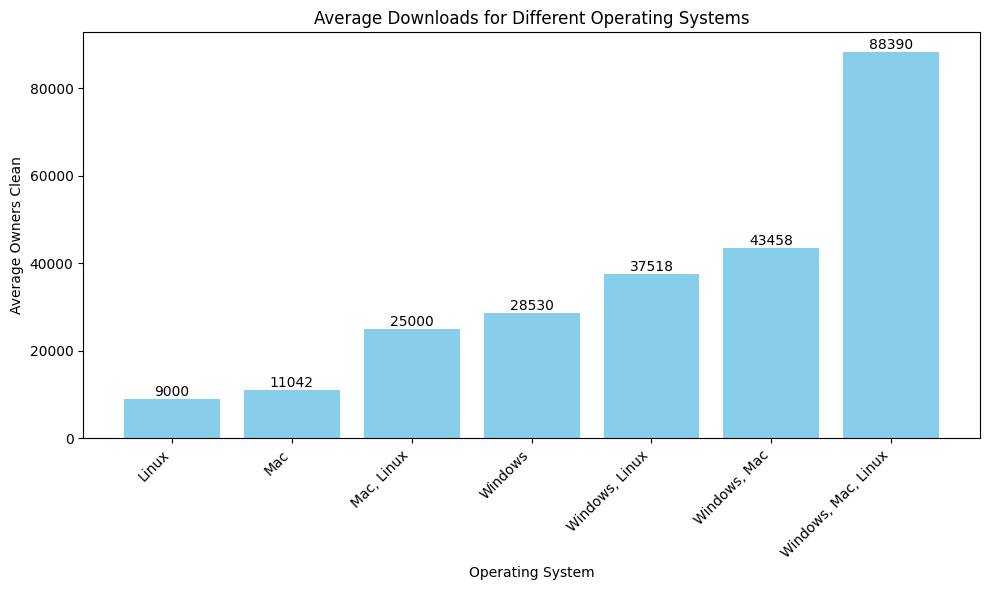

In [56]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(downloads_for_os['OS'], downloads_for_os['OwnersClean'], color='skyblue')
plt.title('Average Downloads for Different Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Average Owners Clean')

# Añadir etiquetas en las barras sin decimales
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(round(yval)), ha='center', va='bottom', color='black', size=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price

Most expensive games

In [54]:
games['Price'].value_counts()

Price
0.00     16456
4.99      7752
9.99      7199
0.99      6497
1.99      5192
         ...  
4.40         1
7.94         1
39.39        1
13.91        1
9.12         1
Name: count, Length: 584, dtype: int64

In [57]:
# Usar groupby, sum y sort_values para obtener las 10 juegos más caros
most_expensive_games = games.groupby('Name')['Price'].sum().reset_index().sort_values('Price', ascending=False).head(10)

print(most_expensive_games)

                                                    Name   Price
70121                 The Leverage Game Business Edition  999.98
70120                                  The Leverage Game  999.98
4824                   Ascent Free-Roaming VR Experience  999.00
1786                               Aartform Curvy 3D 3.0  299.90
20872                                   EA SPORTS FC™ 24  279.96
32897                                      Houdini Indie  269.99
75588                      VEGAS 19 Edit - Steam Edition  249.00
21181                                  Earthquake escape  199.99
21341           Eco-friendly Car VR Maintenance Training  199.99
75059  Underground roof fall hazard assessment VR Tra...  199.99


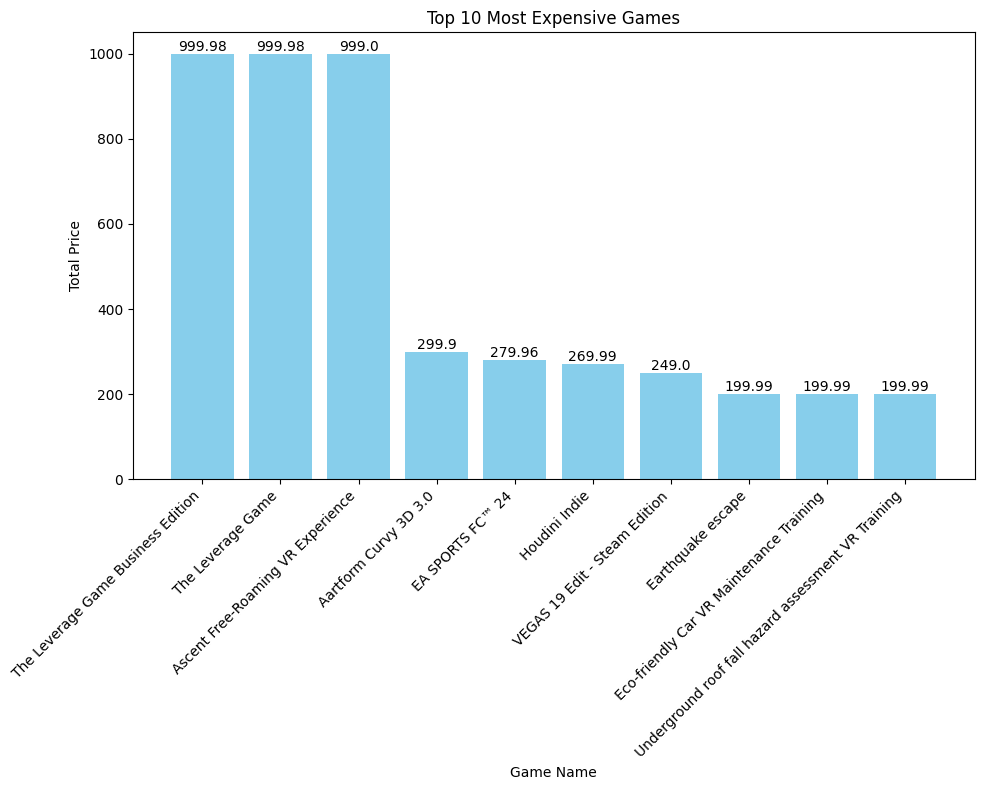

In [59]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
bars = plt.bar(most_expensive_games['Name'], most_expensive_games['Price'], color='skyblue')
plt.title('Top 10 Most Expensive Games')
plt.xlabel('Game Name')
plt.ylabel('Total Price')

# Añadir etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', size=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()